# End-to-End Twitter Turkish Sentiment Analysis Application
## 1-Download Data


### Mount Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!ls /content/drive/MyDrive/morethan101

data  docs  morethan101_twitter_app.pptx  notebooks


In [2]:
import os
os.chdir('/content/drive/MyDrive/morethan101/')

In [6]:
!ls

data  docs  morethan101_twitter_app.pptx  notebooks


### Install Packages

In [3]:
!pip3 install snscrape
#!pip3 install git+https://github.com/JustAnotherArchivist/snscrape.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Import Packages

In [4]:
import snscrape.modules.twitter as sntwitter
import pandas as pd
from datetime import timedelta
from os import mkdir, path
import os

### Twitter Search by Hashtag 

In [5]:
def twint_search_new_hastag(searchterm_, since_, until_, lang_='tr', limit=10000):
  query = f"(#{searchterm_}) lang:{lang_} since:{since_} until:{until_}"
  #query = (#deprem) lang:tr since:2023-02-06 until:2023-02-07
  tweets = []
  limit = limit

  print(query)

  q = sntwitter.TwitterSearchScraper(query)
  for tweet in q.get_items():
    #print(tweet.content)
    #break

    if len(tweets) == limit:
      break
    else:
      tweets.append([tweet.id, tweet.date, tweet.username, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.url])
          
  df = pd.DataFrame(tweets, columns=['ID', 'Date', 'Username', 'Tweet', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'URL'])

  csv_name = "data/" + searchterm_.replace("#","hastag_").replace("\"","").replace(" ","_") + "_" + str(since_) + "_" + str(until_)  + ".csv"

  df.to_csv(csv_name, index=False)

  print("succecss")

### Twitter Search by Username 

In [6]:
def twint_search_from_username(username_, since_, until_, lang_='tr', limit=10000):
  #query = searchterm + ' lang:en until:' + until + 'since:' + since
  query = f"(from:{username_}) until:{until_} since:{since_}"
  #(from:01CoinTeam) until:2022-09-24 since:2022-09-14


  tweets = []
  limit = limit

  q = sntwitter.TwitterSearchScraper(query)
  for tweet in q.get_items():
    #print(tweet.content)
    #break
    print(type(tweet))

    if len(tweets) == limit:
      break
    else:
      tweets.append([tweet.id, tweet.date, tweet.username, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.url])
          
  df = pd.DataFrame(tweets, columns=['ID', 'Date', 'Username', 'Tweet', 'ReplyCount', 'RetweetCount', 'LikeCount', 'QuoteCount', 'URL'])

  csv_name = "data/" + username_.replace("#","hastag_").replace("\"","").replace(" ","_") + "_" + str(since_) + "_" + str(until_)  + ".csv"

  df.to_csv(csv_name, index=False)

  print("succecss")

### DOWNLOAD SEARCH DATA

In [24]:
dt_since = "2023-02-06"
dt_until = "2023-02-07"
search_hashtag = "deprem"

twint_search_new_hastag(search_hashtag, dt_since, dt_until, lang_='tr', limit=20000)

(#deprem) lang:tr since:2023-02-06 until:2023-02-07


<ipython-input-5-2e895f239bdb>:17: FutureWarning: username is deprecated, use user.username instead
  tweets.append([tweet.id, tweet.date, tweet.username, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.url])
<ipython-input-5-2e895f239bdb>:17: FutureWarning: content is deprecated, use rawContent instead
  tweets.append([tweet.id, tweet.date, tweet.username, tweet.content, tweet.replyCount, tweet.retweetCount, tweet.likeCount, tweet.quoteCount, tweet.url])


succecss


### CSV TO DATAFRAME

In [25]:
!ls "data/"

deprem_2023-02-06_2023-02-07.csv


In [26]:
path_to_csv = "data/"
csv_files = [pos_csv for pos_csv in os.listdir(path_to_csv) if pos_csv.endswith('.csv')]
csv_files

['deprem_2023-02-06_2023-02-07.csv']

In [27]:
dfs = []
for index, js in enumerate(csv_files):
  file_path = os.path.join(path_to_csv, js)
  print(file_path)
  data = pd.read_csv(file_path, encoding='utf-8', engine='python')
  dfs.append(data)


df = pd.concat(dfs, ignore_index=True)

data/deprem_2023-02-06_2023-02-07.csv


In [28]:
df

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL
0,1622746962318577664,2023-02-06 23:59:59+00:00,Brk34587273,İstanbulda gök gürültüsü başladı Allah’ım sen ...,0,1,1,0,https://twitter.com/Brk34587273/status/1622746...
1,1622746958363328512,2023-02-06 23:59:58+00:00,SerbestSabuncu,#deprem \nBu gece dualarımız enkaz altında kal...,0,1,1,0,https://twitter.com/SerbestSabuncu/status/1622...
2,1622746957792915457,2023-02-06 23:59:58+00:00,zeynepkacar2504,Ülkede afet var fırsatçılar iş başında..!\nÜlk...,0,1,2,0,https://twitter.com/zeynepkacar2504/status/162...
3,1622746957172117505,2023-02-06 23:59:58+00:00,Ahmetusmann,ARKADAŞIMIZDAN HABER ALAMIYORUZ ACİLEN RT ATIP...,11,1102,571,9,https://twitter.com/Ahmetusmann/status/1622746...
4,1622746954118619137,2023-02-06 23:59:57+00:00,aligsderya,Askerlerimiz kışladan çıksın Yollar KAPALI z...,0,0,7,0,https://twitter.com/aligsderya/status/16227469...
...,...,...,...,...,...,...,...,...,...
19995,1622721663790985217,2023-02-06 22:19:28+00:00,AruobaB,İnanamıyorum insanlarımız ölüyo hem de saçma s...,0,0,0,0,https://twitter.com/AruobaB/status/16227216637...
19996,1622721663631589376,2023-02-06 22:19:27+00:00,halit_tazeoglu,Dışarıda soğukta kalan varsa Gaziantep Ortadoğ...,1,0,1,0,https://twitter.com/halit_tazeoglu/status/1622...
19997,1622721662624956416,2023-02-06 22:19:27+00:00,anildegilim,@grahamlicc ‼️ arkadasimin halasindan 20 saatt...,0,0,0,0,https://twitter.com/anildegilim/status/1622721...
19998,1622721662306189317,2023-02-06 22:19:27+00:00,BayogluIsrafil,"Biz ne ara bu kadar kötü, çıkarcı, vefasız ve ...",1,0,6,0,https://twitter.com/BayogluIsrafil/status/1622...


In [29]:
df[(df["Date"].str.contains('\\d', regex=True))]

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL
0,1622746962318577664,2023-02-06 23:59:59+00:00,Brk34587273,İstanbulda gök gürültüsü başladı Allah’ım sen ...,0,1,1,0,https://twitter.com/Brk34587273/status/1622746...
1,1622746958363328512,2023-02-06 23:59:58+00:00,SerbestSabuncu,#deprem \nBu gece dualarımız enkaz altında kal...,0,1,1,0,https://twitter.com/SerbestSabuncu/status/1622...
2,1622746957792915457,2023-02-06 23:59:58+00:00,zeynepkacar2504,Ülkede afet var fırsatçılar iş başında..!\nÜlk...,0,1,2,0,https://twitter.com/zeynepkacar2504/status/162...
3,1622746957172117505,2023-02-06 23:59:58+00:00,Ahmetusmann,ARKADAŞIMIZDAN HABER ALAMIYORUZ ACİLEN RT ATIP...,11,1102,571,9,https://twitter.com/Ahmetusmann/status/1622746...
4,1622746954118619137,2023-02-06 23:59:57+00:00,aligsderya,Askerlerimiz kışladan çıksın Yollar KAPALI z...,0,0,7,0,https://twitter.com/aligsderya/status/16227469...
...,...,...,...,...,...,...,...,...,...
19995,1622721663790985217,2023-02-06 22:19:28+00:00,AruobaB,İnanamıyorum insanlarımız ölüyo hem de saçma s...,0,0,0,0,https://twitter.com/AruobaB/status/16227216637...
19996,1622721663631589376,2023-02-06 22:19:27+00:00,halit_tazeoglu,Dışarıda soğukta kalan varsa Gaziantep Ortadoğ...,1,0,1,0,https://twitter.com/halit_tazeoglu/status/1622...
19997,1622721662624956416,2023-02-06 22:19:27+00:00,anildegilim,@grahamlicc ‼️ arkadasimin halasindan 20 saatt...,0,0,0,0,https://twitter.com/anildegilim/status/1622721...
19998,1622721662306189317,2023-02-06 22:19:27+00:00,BayogluIsrafil,"Biz ne ara bu kadar kötü, çıkarcı, vefasız ve ...",1,0,6,0,https://twitter.com/BayogluIsrafil/status/1622...


In [30]:
df = df[~(df["Date"].str.contains('http', case=False))]
df = df[~(df["Date"].str.contains('#', case=False))]
df = df[(df["Date"].str.contains('\\d', regex=True))]

In [31]:
df['Date'] = pd.to_datetime(df['Date'])
df

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL
0,1622746962318577664,2023-02-06 23:59:59+00:00,Brk34587273,İstanbulda gök gürültüsü başladı Allah’ım sen ...,0,1,1,0,https://twitter.com/Brk34587273/status/1622746...
1,1622746958363328512,2023-02-06 23:59:58+00:00,SerbestSabuncu,#deprem \nBu gece dualarımız enkaz altında kal...,0,1,1,0,https://twitter.com/SerbestSabuncu/status/1622...
2,1622746957792915457,2023-02-06 23:59:58+00:00,zeynepkacar2504,Ülkede afet var fırsatçılar iş başında..!\nÜlk...,0,1,2,0,https://twitter.com/zeynepkacar2504/status/162...
3,1622746957172117505,2023-02-06 23:59:58+00:00,Ahmetusmann,ARKADAŞIMIZDAN HABER ALAMIYORUZ ACİLEN RT ATIP...,11,1102,571,9,https://twitter.com/Ahmetusmann/status/1622746...
4,1622746954118619137,2023-02-06 23:59:57+00:00,aligsderya,Askerlerimiz kışladan çıksın Yollar KAPALI z...,0,0,7,0,https://twitter.com/aligsderya/status/16227469...
...,...,...,...,...,...,...,...,...,...
19995,1622721663790985217,2023-02-06 22:19:28+00:00,AruobaB,İnanamıyorum insanlarımız ölüyo hem de saçma s...,0,0,0,0,https://twitter.com/AruobaB/status/16227216637...
19996,1622721663631589376,2023-02-06 22:19:27+00:00,halit_tazeoglu,Dışarıda soğukta kalan varsa Gaziantep Ortadoğ...,1,0,1,0,https://twitter.com/halit_tazeoglu/status/1622...
19997,1622721662624956416,2023-02-06 22:19:27+00:00,anildegilim,@grahamlicc ‼️ arkadasimin halasindan 20 saatt...,0,0,0,0,https://twitter.com/anildegilim/status/1622721...
19998,1622721662306189317,2023-02-06 22:19:27+00:00,BayogluIsrafil,"Biz ne ara bu kadar kötü, çıkarcı, vefasız ve ...",1,0,6,0,https://twitter.com/BayogluIsrafil/status/1622...


In [32]:
df['Date'].describe()

<ipython-input-32-a430526189f8>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['Date'].describe()


count                         20000
unique                         5774
top       2023-02-06 22:24:20+00:00
freq                             14
first     2023-02-06 22:19:27+00:00
last      2023-02-06 23:59:59+00:00
Name: Date, dtype: object

In [33]:
df['Date'].value_counts()

2023-02-06 22:24:20+00:00    14
2023-02-06 22:20:07+00:00    12
2023-02-06 22:34:36+00:00    12
2023-02-06 22:27:16+00:00    12
2023-02-06 22:23:55+00:00    12
                             ..
2023-02-06 22:41:08+00:00     1
2023-02-06 22:41:15+00:00     1
2023-02-06 22:41:17+00:00     1
2023-02-06 22:41:18+00:00     1
2023-02-06 23:59:59+00:00     1
Name: Date, Length: 5774, dtype: int64

In [34]:
#df[df['Date'].dt.strftime('%Y-%m-%d')=='2022-09-12']
#df = df[df['Date'].dt.strftime('%Y-%m')=='2022-09']

In [35]:
df['Date'].value_counts()

2023-02-06 22:24:20+00:00    14
2023-02-06 22:20:07+00:00    12
2023-02-06 22:34:36+00:00    12
2023-02-06 22:27:16+00:00    12
2023-02-06 22:23:55+00:00    12
                             ..
2023-02-06 22:41:08+00:00     1
2023-02-06 22:41:15+00:00     1
2023-02-06 22:41:17+00:00     1
2023-02-06 22:41:18+00:00     1
2023-02-06 23:59:59+00:00     1
Name: Date, Length: 5774, dtype: int64

<AxesSubplot:>

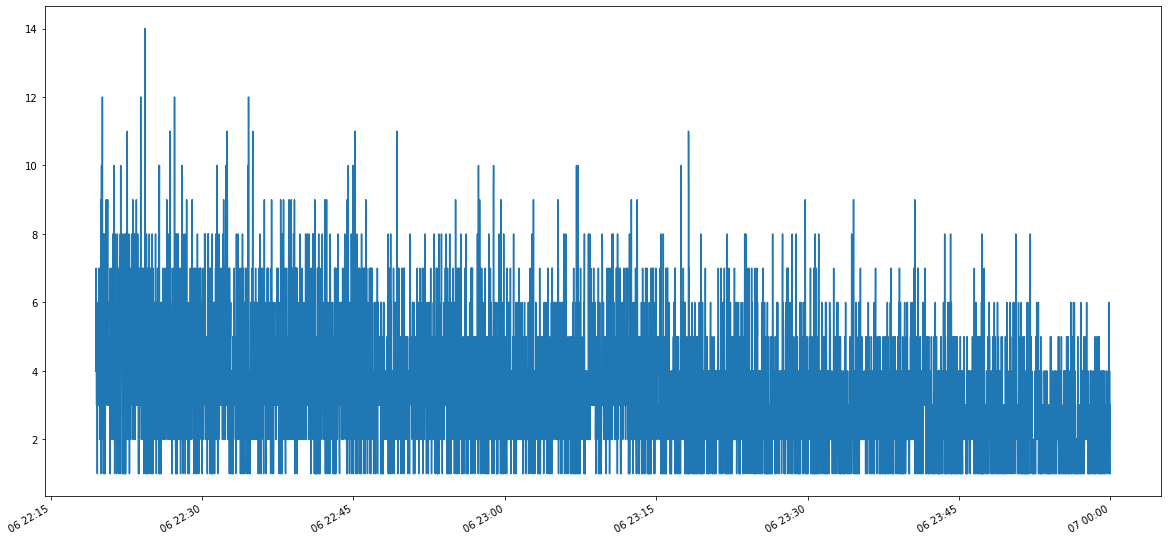

In [36]:
%matplotlib inline

df['Date'].value_counts().plot(figsize=(20,10))

In [37]:
duplicate = df[df.duplicated("Tweet")]
duplicate

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL
456,1622746069359525888,2023-02-06 23:56:26+00:00,iptalolsuns,"HATAY/ANTAKYA NARLICA MAHALLESİ, VALİ UTKU AC...",2,10,8,0,https://twitter.com/iptalolsuns/status/1622746...
823,1622745359054168065,2023-02-06 23:53:37+00:00,semiramisss682,İnsan uyumaya utanıyor #deprem,0,0,8,0,https://twitter.com/semiramisss682/status/1622...
980,1622745065679474690,2023-02-06 23:52:27+00:00,Kalbi_Duam_,Allahım sokaklar buz gibi nerede ise 24 saat o...,0,0,2,0,https://twitter.com/Kalbi_Duam_/status/1622745...
1006,1622744997438136323,2023-02-06 23:52:11+00:00,Trabzonder,Lütfen hastage destek çıkalım #TSKsahaya ! #De...,6,42,70,0,https://twitter.com/Trabzonder/status/16227449...
1064,1622744909185794048,2023-02-06 23:51:50+00:00,blackbaduvan,LÜTFEN DUYULMASINA YARDIM EDİN #deprem,0,1,1,0,https://twitter.com/blackbaduvan/status/162274...
...,...,...,...,...,...,...,...,...,...
19630,1622721983661150209,2023-02-06 22:20:44+00:00,ArntoraWarrior,"Emel,İbrahim ve Müzeyyen Uludağ \n\nHatice Öna...",1,33,9,2,https://twitter.com/ArntoraWarrior/status/1622...
19711,1622721921593798657,2023-02-06 22:20:29+00:00,muhendisyenn,"Türk Hava Yolları; Adana, Diyarbakır, Şanlıurf...",39,175,711,2,https://twitter.com/muhendisyenn/status/162272...
19768,1622721868363866112,2023-02-06 22:20:16+00:00,12numaraorg,📢 ELBİSTAN İÇİN ACİL YARDIM İHTİYACI!\n\n@Kizi...,6,178,233,5,https://twitter.com/12numaraorg/status/1622721...
19855,1622721792493092871,2023-02-06 22:19:58+00:00,izotunuz,elif ezelsoy ve ailesine VINCE IHTIYACI VAR EK...,1,26,23,1,https://twitter.com/izotunuz/status/1622721792...


In [38]:
len(duplicate)

193

In [39]:
df_unique = df.drop_duplicates("Tweet")
df_unique

,ID,Date,Username,Tweet,ReplyCount,RetweetCount,LikeCount,QuoteCount,URL
0,1622746962318577664,2023-02-06 23:59:59+00:00,Brk34587273,İstanbulda gök gürültüsü başladı Allah’ım sen ...,0,1,1,0,https://twitter.com/Brk34587273/status/1622746...
1,1622746958363328512,2023-02-06 23:59:58+00:00,SerbestSabuncu,#deprem \nBu gece dualarımız enkaz altında kal...,0,1,1,0,https://twitter.com/SerbestSabuncu/status/1622...
2,1622746957792915457,2023-02-06 23:59:58+00:00,zeynepkacar2504,Ülkede afet var fırsatçılar iş başında..!\nÜlk...,0,1,2,0,https://twitter.com/zeynepkacar2504/status/162...
3,1622746957172117505,2023-02-06 23:59:58+00:00,Ahmetusmann,ARKADAŞIMIZDAN HABER ALAMIYORUZ ACİLEN RT ATIP...,11,1102,571,9,https://twitter.com/Ahmetusmann/status/1622746...
4,1622746954118619137,2023-02-06 23:59:57+00:00,aligsderya,Askerlerimiz kışladan çıksın Yollar KAPALI z...,0,0,7,0,https://twitter.com/aligsderya/status/16227469...
...,...,...,...,...,...,...,...,...,...
19995,1622721663790985217,2023-02-06 22:19:28+00:00,AruobaB,İnanamıyorum insanlarımız ölüyo hem de saçma s...,0,0,0,0,https://twitter.com/AruobaB/status/16227216637...
19996,1622721663631589376,2023-02-06 22:19:27+00:00,halit_tazeoglu,Dışarıda soğukta kalan varsa Gaziantep Ortadoğ...,1,0,1,0,https://twitter.com/halit_tazeoglu/status/1622...
19997,1622721662624956416,2023-02-06 22:19:27+00:00,anildegilim,@grahamlicc ‼️ arkadasimin halasindan 20 saatt...,0,0,0,0,https://twitter.com/anildegilim/status/1622721...
19998,1622721662306189317,2023-02-06 22:19:27+00:00,BayogluIsrafil,"Biz ne ara bu kadar kötü, çıkarcı, vefasız ve ...",1,0,6,0,https://twitter.com/BayogluIsrafil/status/1622...


In [40]:
df_unique.to_csv("data/deprem_hashtag_subat_2023_unique.csv")